# K-Means Clustering



## Objectives



*   Using scikit-learn's K-Means Clustering to cluster data

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https://#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="https://#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="https://#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="https://#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling</a></li>
                <li><a href="https://#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [17]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1


Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [1]:

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

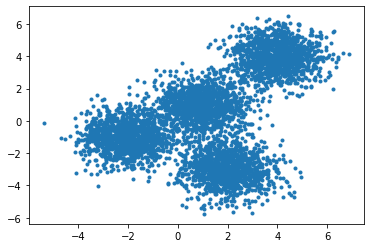

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.


In [6]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


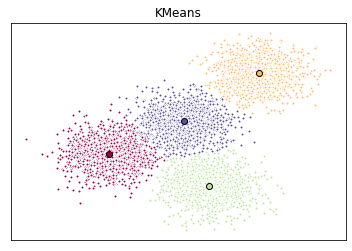

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
